In [29]:
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.neighbors import KNeighborsClassifier
    import matplotlib.pyplot as plt
    import plotly.express as px
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import GridSearchCV

In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/digipodium/Datasets/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

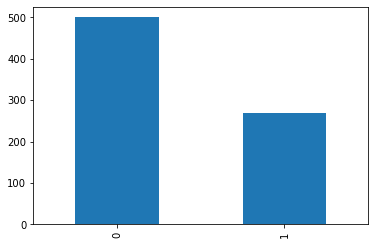

In [31]:
df.Outcome.value_counts().plot(kind='bar')


In [32]:
X = df[['Glucose','BloodPressure']]
y = df['Outcome']
scaler = StandardScaler()
scaledX = scaler.fit_transform(X)
xtrain, xtest, ytrain, ytest = train_test_split(scaledX,y,test_size=.2,)
xtrain.shape,xtest.shape

((614, 2), (154, 2))

In [33]:
m = KNeighborsClassifier(n_neighbors=7)
m.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=7)

In [34]:
m.score(xtest,ytest) # you should not see the score like this, we use other stuff

0.7402597402597403

In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [36]:
ypred = m.predict(xtest)

In [37]:
import seaborn as sns

In [38]:
cm = confusion_matrix(ytest, ypred)
print(cm)

[[91  8]
 [32 23]]


In [39]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82        99
           1       0.74      0.42      0.53        55

    accuracy                           0.74       154
   macro avg       0.74      0.67      0.68       154
weighted avg       0.74      0.74      0.72       154



In [40]:
from matplotlib.colors import ListedColormap
import numpy as np

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


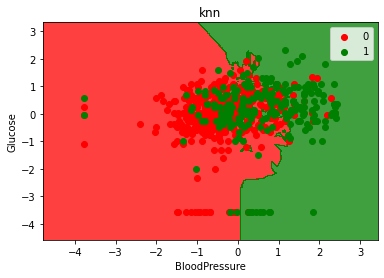

In [41]:
from utils import plot_area_distribution
plot_area_distribution(m,xtrain,ytrain,"knn",'BloodPressure','Glucose')

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [43]:
X = df[['Glucose','BloodPressure','Age']]
y = df['Outcome']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=1)

In [44]:

print("KNeighborsClassifier")
model2 = KNeighborsClassifier()
model2.fit(xtrain,ytrain)
print("score:",model2.score(xtest,ytest)*100)
pred = model2.predict(X)
print("mse:",mean_squared_error(y,pred))
print("mse:",mean_absolute_error(y,pred))


KNeighborsClassifier
score: 75.32467532467533
mse: 0.21875
mse: 0.21875


In [45]:
knn_score = cross_val_score(model2,X,y,cv=6)
print(knn_score,f"average:{knn_score.mean():.2f}",f"std:{knn_score.std():.2f}")

[0.71875   0.6328125 0.671875  0.765625  0.7890625 0.7578125] average:0.72 std:0.06


In [46]:
params ={ 
    'n_neighbors' : list(range(100,501,200)),
    'algorithm' :["ball_tree","kd_tree","brute","auto"],
    'weights': ['uniform'],
    'p':[2]
}
params

{'n_neighbors': [100, 300, 500],
 'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
 'weights': ['uniform'],
 'p': [2]}

In [47]:
grid = GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params,cv=3,n_jobs=-1,verbose=2)


In [48]:
grid.fit(scaledX,y)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute', 'auto'],
                         'n_neighbors': [100, 300, 500], 'p': [2],
                         'weights': ['uniform']},
             verbose=2)

In [49]:
kn=pd.DataFrame(grid.cv_results_)

In [50]:
kn.sort_values(by='rank_test_score',inplace=True)

In [51]:
kn

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
3,0.000000,0.000000,0.026666,0.020998,kd_tree,100,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 100, '...",0.738281,0.726562,0.746094,0.736979,0.008027,1
6,0.000000,0.000000,0.026667,0.026398,brute,100,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 100, 'p'...",0.738281,0.726562,0.746094,0.736979,0.008027,1
9,0.000000,0.000000,0.018667,0.003771,auto,100,2,uniform,"{'algorithm': 'auto', 'n_neighbors': 100, 'p':...",0.738281,0.726562,0.746094,0.736979,0.008027,1
0,0.005334,0.003771,0.010667,0.003771,ball_tree,100,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 100,...",0.734375,0.726562,0.746094,0.735677,0.008027,4
1,0.002667,0.003771,0.024001,0.006533,ball_tree,300,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 300,...",0.648438,0.652344,0.652344,0.651042,0.001841,5
2,0.000000,0.000000,0.026666,0.003771,ball_tree,500,2,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 500,...",0.648438,0.652344,0.652344,0.651042,0.001841,5
4,0.002666,0.003771,0.021334,0.003771,kd_tree,300,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 300, '...",0.648438,0.652344,0.652344,0.651042,0.001841,5
5,0.005334,0.003771,0.026666,0.003771,kd_tree,500,2,uniform,"{'algorithm': 'kd_tree', 'n_neighbors': 500, '...",0.648438,0.652344,0.652344,0.651042,0.001841,5
7,0.002666,0.003771,0.024000,0.006532,brute,300,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 300, 'p'...",0.648438,0.652344,0.652344,0.651042,0.001841,5
8,0.000000,0.000000,0.029333,0.003771,brute,500,2,uniform,"{'algorithm': 'brute', 'n_neighbors': 500, 'p'...",0.648438,0.652344,0.652344,0.651042,0.001841,5


In [52]:
grid.best_estimator_

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=100)

In [53]:
from joblib import dump,load

In [54]:
dump(grid.best_estimator_,"diabetes_model.pkl")

['diabetes_model.pkl']

In [55]:
KNeighborsClassifier?

Init signature:
KNeighborsClassifier(
    n_neighbors=5,
    *,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    metric_params=None,
    n_jobs=None,
)
Docstring:     
Classifier implementing the k-nearest neighbors vote.

Read more in the :ref:`User Guide <classification>`.

Parameters
----------
n_neighbors : int, default=5
    Number of neighbors to use by default for :meth:`kneighbors` queries.

weights : {'uniform', 'distance'} or callable, default='uniform'
    Weight function used in prediction.  Possible values:

    - 'uniform' : uniform weights.  All points in each neighborhood
      are weighted equally.
    - 'distance' : weight points by the inverse of their distance.
      in this case, closer neighbors of a query point will have a
      greater influence than neighbors which are further away.
    - [callable] : a user-defined function which accepts an
      array of distances, and returns an array of the same shape
     

In [56]:
from joblib import dump

In [57]:
model_dict={
    'title':'classification model for ad click prediction',
    'classifier':m,
    'scaler':scaler,
}

dump(model_dict, "clf_ap.pkl")

['clf_ap.pkl']